In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import Holt
import time_wrangler

# Time Series Mini Project

---
****
#Executive Summary
## Goals:

# Choose one city from Kagle data, analyze the patterns in temperature over time and model those patterns to forecast temperature into the future 


I selected Mexico City intially because of its clean data then moved to Berlin because I got in to the weeds. 

## Key Findings:

Modeling was a mess, RSME was 13 my models returned 2.

## Takeaway:

Temprature is increasing. 

## Recommendation:

Rerun models on various cities to examine if low rmse is my fault or because of data. 

***
---

# Acquire:
***
---

In [2]:
#need to download zip file from Kagle and unzip to retrieve 'GlobalLandTemperaturesByMajorCity.csv'
#this is just bringing in csv
df= time_wrangler.get_mcity_data()

# Prepare:
***
---

In [3]:
#this function is a mess there is no markdown information inside but it drops 2013, and anything before 1835, it also renames columns,
# and changes dt to dtg and makes dtg the index I did not convert to celsius to fahrenheit
df=time_wrangler.get_berlin(df)

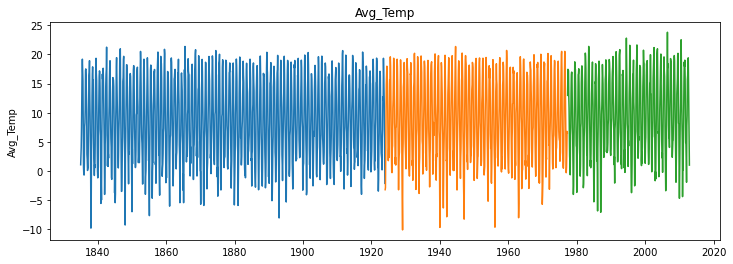

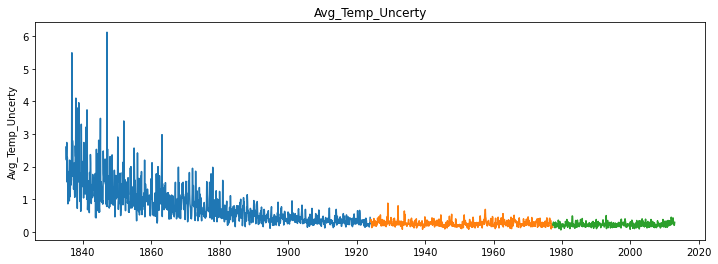

In [6]:
df = df.drop(['City'], axis=1)

train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]
    
for col in train.columns:
        plt.figure(figsize=(12,4))
        plt.plot(train[col])
        plt.plot(validate[col])
        plt.plot(test[col])
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [7]:
#prepping data for modeling
train = train[['Avg_Temp']]
validate = validate[['Avg_Temp']]
test = test[['Avg_Temp']]
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

---
***
# Modeling
***
----

In [8]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [10]:
temp = round(train['Avg_Temp'][-1:][0], 2)

yhat_df = pd.DataFrame({'Avg_Temp': [temp]}, 
                       index = validate.index)
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,Avg_Temp,13.0


In [11]:
temp = round(train['Avg_Temp'].mean(), 2)

yhat_df = pd.DataFrame({'Avg_Temp': [temp],}, index = validate.index)

for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,Avg_Temp,13.0
1,simple_average,Avg_Temp,7.0


In [12]:
train = df[:'2010']
validate = df['2011']
test = df['2012':]
train = train[['Avg_Temp']]
validate = validate[['Avg_Temp']]
test = test[['Avg_Temp']]

In [13]:
yhat_df = train['2000'] + train.diff(365).mean()
pd.concat([yhat_df.head(1), validate.head(1)])


,Avg_Temp
Year_Month,
2000-01-01,1.609536
2011-01-01,1.610000


In [14]:
yhat_df.index = validate.index

for col in train.columns:
    eval_df = append_eval_df(model_type = 'previous year', target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,Avg_Temp,13.0
1,simple_average,Avg_Temp,7.0
2,previous year,Avg_Temp,2.0


In [15]:
yhat_df = validate + train.diff(365).mean()
yhat_df.index = test.index
rmse_temp = round(sqrt(mean_squared_error(test['Avg_Temp'], yhat_df['Avg_Temp'])), 0)
print("Test RMSE - avg_temp: ", rmse_temp)

Test RMSE - avg_temp:  2.0


---
***
# Conclusion:
Modeling was a mess, RSME was 13 my models returned 2.

## Takeaway:

Temprature is increasing. 

## Recommendation:

Rerun models on various cities to examine if low rmse is my fault or because of data. 

### Next steps are to refine functions clean up notebook and then run test on other cities. 
***
---

## To reproduce these fantastic results you will need to download the kagle zip for the 'GlobalLandTemperaturesByMajorCity.csv'
## and also download my time_wrangle.py 